### Creating tables with geodata

In [1]:
import csv
import numpy as np
import matplotlib as plt 
import matplotlib.pyplot as plt 
import pandas as pd

#### 1. Read tables cars, people, salaries

In [2]:
cars=pd.read_excel("cars.xlsx")
cars.head(3)

,Year,Copenhagen,City centre,Østerbro,Nørrebro,Vesterbro/Kongens Enghave,Valby,Vanløse,Brønshøj-Husum,Bispebjerg,Amager Øst,Amager Vest
0,2006,91706,9271,13001,9549,7097,9397,8585,8941,7623,8937,9121
1,2007,96278,9787,13548,9919,7824,9772,8842,9241,7906,9316,9985
2,2008,99613,9990,14042,10148,8279,10045,8995,9382,8285,9617,10692


To do: calculate cars/100people or 1000 people

In [3]:
people=pd.read_excel("people.xlsx")
people

,Year,Copenhagen,City centre,Østerbro,Nørrebro,Vesterbro/Kongens Enghave,Valby,Vanløse,Brønshøj-Husum,Bispebjerg,Amager Øst,Amager Vest
0,2006,501189,44737,67366,71824,50299,45603,36156,39649,44984,48532,48575
1,2007,503752,45433,67351,71330,50966,45208,35781,39464,45532,48453,51109
2,2008,509908,45667,67974,71574,51488,45465,35893,39420,46396,48872,53374
3,2009,518544,46423,68771,71890,53358,46387,36113,39571,47193,49707,55082
4,2010,528265,47511,69954,72915,55316,47122,36579,39827,47991,50274,56506
5,2011,538642,48251,70908,74113,57133,47841,37123,40402,49163,50841,57893
6,2012,549223,49741,72407,75425,58431,48694,37902,41347,50555,51549,59733
7,2013,559731,50554,73421,76602,59240,49677,38618,42294,51519,52481,61687
8,2014,570171,51424,74521,77807,60328,50941,39214,43056,52499,53323,63479
9,2015,580292,51937,75113,78802,61623,51727,39537,43908,53604,55205,64967


In [4]:
salaries=pd.read_excel("salaries.xlsx")
salaries.head(3)

,Year,Copenhagen,City centre,Østerbro,Nørrebro,Vesterbro/Kongens Enghave,Valby,Vanløse,Brønshøj-Husum,Bispebjerg,Amager Øst,Amager Vest
0,2006,247331,322133,273612,215886,230585,243757,264082,243739,219029,237030,240979
1,2007,258818,331256,287558,224614,244459,256889,275654,253708,229777,249428,254826
2,2008,268108,334511,296933,232053,256375,266115,288042,262646,238161,259957,267554


#### 2. Read geo data with geopandas (as gdp)

In [5]:
#geo=gdp.read_file('neighborhood.shp')
#geo['navn']=['Nørrebro', 'Brønshøj-Husum', 'Bispebjerg', 'Amager Vest','Vanløse','City centre', 'Amager Øst', 'Østerbro', 'Vesterbro/Kongens Enghave', 'Valby']
#geo.plot()

##### 3. Map plots with geopandas

In [6]:
import matplotlib.pyplot as plt

#geo.plot(column='navn', legend=True)

#plt.title('Copenhagen neighborhoods')



In [7]:
# all cars, all years, all neighborhoods
cars=pd.read_excel("cars.xlsx")

# select a year for the map
cars2019=cars[cars['Year']==2019]
cars2019

,Year,Copenhagen,City centre,Østerbro,Nørrebro,Vesterbro/Kongens Enghave,Valby,Vanløse,Brønshøj-Husum,Bispebjerg,Amager Øst,Amager Vest
13,2019,129545,11986,17173,12292,12598,13564,10793,11675,10633,12683,16027


In [8]:
cars=pd.read_excel("cars.xlsx")
cars2019=cars[cars['Year']==2019]

cars2019=cars2019.T
cars2019['cars']=cars2019[13]
cars2019=pd.DataFrame(data=cars2019['cars'])
cars2019=cars2019.drop(['Year'])
cars2019


,cars
Copenhagen,129545
City centre,11986
Østerbro,17173
Nørrebro,12292
Vesterbro/Kongens Enghave,12598
Valby,13564
Vanløse,10793
Brønshøj-Husum,11675
Bispebjerg,10633
Amager Øst,12683


In [9]:
cars=pd.read_excel("cars.xlsx")
cars_100=(cars/people)*100000
cars_100['Year']=([2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])

cars2019=cars_100[cars_100['Year']==2019]
cars2019=cars2019.T
cars2019['cars']=cars2019[13]
cars2019=pd.DataFrame(data=cars2019['cars'])
cars2019=cars2019.drop(['Year'])

# Turn index into column so we can merge
cars2019['navn'] = cars2019.index
cars2019

,cars,navn
Copenhagen,20776.665084,Copenhagen
City centre,21333.475723,City centre
Østerbro,21645.092577,Østerbro
Nørrebro,15247.782671,Nørrebro
Vesterbro/Kongens Enghave,18046.642219,Vesterbro/Kongens Enghave
Valby,23263.073044,Valby
Vanløse,26190.880633,Vanløse
Brønshøj-Husum,25891.510689,Brønshøj-Husum
Bispebjerg,19166.846925,Bispebjerg
Amager Øst,21478.044402,Amager Øst


In [10]:
#geo=gdp.read_file('neighborhood.shp')
#geo['navn']=(['Nørrebro', 'Brønshøj-Husum', 'Bispebjerg', 'Amager Vest','Vanløse','City centre', 'Amager Øst', 'Østerbro', 'Vesterbro/Kongens Enghave', 'Valby'])
#geo

In [11]:
#geo_cars2019=geo.merge(cars2019, on = ['navn'], how='inner')[['navn','cars','geometry']]

#geo_cars2019.head(11)

### Number of cars per 100000 people by neighborhood

In [12]:
cars=pd.read_excel("cars.xlsx")
cars_100=(cars/people)*100000
cars_100['Year']=([2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])

cars2019=cars_100[cars_100['Year']==2019]
cars2019=cars2019.T
cars2019['cars']=cars2019[13]
cars2019=pd.DataFrame(data=cars2019['cars'])
cars2019=cars2019.drop(['Year'])

# Turn index into column so we can merge
cars2019['navn'] = cars2019.index

#geo=gdp.read_file('neighborhood.shp')
#geo['navn']=(['Nørrebro', 'Brønshøj-Husum', 'Bispebjerg', 'Amager Vest','Vanløse','City centre', 'Amager Øst', 'Østerbro', 'Vesterbro/Kongens Enghave', 'Valby'])

#geo_cars2019=geo.merge(cars2019, on = ['navn'], how='inner')[['navn','cars','geometry']]

#geo_cars2019.plot(column='cars', cmap='OrRd')


In [13]:
# set the min and max range for the choropleth map
vmin, vmax = 200, 1200

### Car tables per 100000 inhabitants

In [14]:
cars

,Year,Copenhagen,City centre,Østerbro,Nørrebro,Vesterbro/Kongens Enghave,Valby,Vanløse,Brønshøj-Husum,Bispebjerg,Amager Øst,Amager Vest
0,2006,91706,9271,13001,9549,7097,9397,8585,8941,7623,8937,9121
1,2007,96278,9787,13548,9919,7824,9772,8842,9241,7906,9316,9985
2,2008,99613,9990,14042,10148,8279,10045,8995,9382,8285,9617,10692
3,2009,100762,9990,14230,9868,8764,10184,9030,9503,8282,9737,11016
4,2010,101701,10084,14295,9724,8976,10371,9075,9491,8430,9824,11307
5,2011,103066,10132,14349,9612,9288,10556,9206,9672,8528,9937,11663
6,2012,104343,10299,14546,9555,9297,10726,9316,9851,8663,9927,12014
7,2013,105984,10425,14639,9603,9374,10929,9465,10036,8788,10118,12465
8,2014,109245,10707,14951,9928,9834,11314,9606,10252,8972,10527,13003
9,2015,113209,11009,15353,10447,10206,11737,9945,10520,9273,10972,13566


In [15]:
people

,Year,Copenhagen,City centre,Østerbro,Nørrebro,Vesterbro/Kongens Enghave,Valby,Vanløse,Brønshøj-Husum,Bispebjerg,Amager Øst,Amager Vest
0,2006,501189,44737,67366,71824,50299,45603,36156,39649,44984,48532,48575
1,2007,503752,45433,67351,71330,50966,45208,35781,39464,45532,48453,51109
2,2008,509908,45667,67974,71574,51488,45465,35893,39420,46396,48872,53374
3,2009,518544,46423,68771,71890,53358,46387,36113,39571,47193,49707,55082
4,2010,528265,47511,69954,72915,55316,47122,36579,39827,47991,50274,56506
5,2011,538642,48251,70908,74113,57133,47841,37123,40402,49163,50841,57893
6,2012,549223,49741,72407,75425,58431,48694,37902,41347,50555,51549,59733
7,2013,559731,50554,73421,76602,59240,49677,38618,42294,51519,52481,61687
8,2014,570171,51424,74521,77807,60328,50941,39214,43056,52499,53323,63479
9,2015,580292,51937,75113,78802,61623,51727,39537,43908,53604,55205,64967


In [16]:
#Total nr of new cars registered per 1000 inhabitants
cars_100=cars.div(people)*100000
cars_100['Year']=cars['Year']
cars_100=round(cars_100, 2)
cars_100

,Year,Copenhagen,City centre,Østerbro,Nørrebro,Vesterbro/Kongens Enghave,Valby,Vanløse,Brønshøj-Husum,Bispebjerg,Amager Øst,Amager Vest
0,2006,18297.69,20723.34,19299.05,13295.00,14109.62,20606.10,23744.33,22550.38,16946.03,18414.65,18777.15
1,2007,19112.18,21541.61,20115.51,13905.79,15351.41,21615.64,24711.44,23416.28,17363.61,19226.88,19536.68
2,2008,19535.48,21875.75,20657.90,14178.33,16079.47,22093.92,25060.60,23800.10,17857.14,19677.93,20032.23
3,2009,19431.72,21519.51,20691.86,13726.53,16424.90,21954.43,25004.85,24015.06,17549.21,19588.79,19999.27
4,2010,19251.89,21224.56,20434.86,13336.08,16226.77,22008.83,24809.32,23830.57,17565.79,19540.92,20010.26
5,2011,19134.42,20998.53,20236.08,12969.38,16256.80,22064.76,24798.64,23939.41,17346.38,19545.25,20145.79
6,2012,18998.29,20705.25,20089.22,12668.21,15911.07,22027.35,24579.18,23825.19,17135.79,19257.41,20112.84
7,2013,18934.81,20621.51,19938.44,12536.23,15823.77,22000.12,24509.30,23729.13,17057.78,19279.36,20206.85
8,2014,19160.04,20821.02,20062.80,12759.78,16300.89,22210.01,24496.35,23810.85,17089.85,19741.95,20483.94
9,2015,19508.97,21196.83,20439.87,13257.28,16562.00,22690.28,25153.65,23959.19,17299.08,19875.01,20881.37


In [17]:
#cars_100.to_csv('cars_100.csv', index=False)

In [18]:
el=pd.read_excel("el.xlsx")
el

,Year,Copenhagen,City centre,Østerbro,Nørrebro,Vesterbro/Kongens Enghave,Valby,Vanløse,Brønshøj-Husum,Bispebjerg,Amager Øst,Amager Vest
0,2006,5,0,0,0,0,0,0,0,0,0,0
1,2007,9,0,0,0,0,0,0,0,0,0,0
2,2008,10,4,0,0,0,0,0,0,0,0,0
3,2009,11,0,0,0,0,0,0,0,0,0,3
4,2010,5,0,0,0,0,0,0,0,0,0,0
5,2011,6,0,0,0,0,0,0,0,0,0,0
6,2012,8,0,0,0,0,0,0,0,0,0,0
7,2013,23,3,5,4,0,0,0,0,0,0,3
8,2014,34,4,11,0,4,0,0,0,0,0,3
9,2015,96,18,16,4,12,7,6,12,4,9,8


In [19]:
el_100=el.div(people)*100000
el_100['Year']=cars['Year']
el_100=round(el_100, 2)
el_100

,Year,Copenhagen,City centre,Østerbro,Nørrebro,Vesterbro/Kongens Enghave,Valby,Vanløse,Brønshøj-Husum,Bispebjerg,Amager Øst,Amager Vest
0,2006,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2007,1.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2008,1.96,8.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2009,2.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.45
4,2010,0.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,2011,1.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,2012,1.46,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,2013,4.11,5.93,6.81,5.22,0.00,0.00,0.00,0.00,0.00,0.00,4.86
8,2014,5.96,7.78,14.76,0.00,6.63,0.00,0.00,0.00,0.00,0.00,4.73
9,2015,16.54,34.66,21.30,5.08,19.47,13.53,15.18,27.33,7.46,16.30,12.31


In [20]:
#el_100.to_csv('el_100.csv', index=False)

In [21]:
#Testing
pd.read_csv("el_100.csv")

,Year,Copenhagen,City centre,Østerbro,Nørrebro,Vesterbro/Kongens Enghave,Valby,Vanløse,Brønshøj-Husum,Bispebjerg,Amager Øst,Amager Vest
0,2006,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2007,1.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2008,1.96,8.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2009,2.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.45
4,2010,0.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,2011,1.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,2012,1.46,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,2013,4.11,5.93,6.81,5.22,0.00,0.00,0.00,0.00,0.00,0.00,4.86
8,2014,5.96,7.78,14.76,0.00,6.63,0.00,0.00,0.00,0.00,0.00,4.73
9,2015,16.54,34.66,21.30,5.08,19.47,13.53,15.18,27.33,7.46,16.30,12.31


In [22]:
hybrid=pd.read_excel("hybrid.xlsx")
hybrid_100=hybrid.div(people)*100000
hybrid_100['Year']=cars['Year']
hybrid_100=round(hybrid_100, 2)
hybrid_100

,Year,Copenhagen,City centre,Østerbro,Nørrebro,Vesterbro/Kongens Enghave,Valby,Vanløse,Brønshøj-Husum,Bispebjerg,Amager Øst,Amager Vest
0,2006,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2007,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2008,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2009,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2010,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,2011,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,2012,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,2013,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,2014,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,2015,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [23]:
#hybrid_100.to_csv('hybrid_100.csv', index=False)

In [24]:
diesel=pd.read_excel("diesel.xlsx")
diesel_100=diesel.div(people)*100000
diesel_100['Year']=cars['Year']
diesel_100=round(diesel_100, 2)
diesel_100

,Year,Copenhagen,City centre,Østerbro,Nørrebro,Vesterbro/Kongens Enghave,Valby,Vanløse,Brønshøj-Husum,Bispebjerg,Amager Øst,Amager Vest
0,2006,1045.71,1327.76,1037.62,861.83,920.50,1162.20,1214.18,1129.92,846.97,1114.73,1068.45
1,2007,1315.33,1694.80,1306.59,1009.39,1130.17,1499.73,1545.51,1538.11,1030.04,1325.00,1416.58
2,2008,1689.13,2124.07,1724.19,1215.53,1514.92,1933.36,2042.18,1933.03,1344.94,1704.45,1828.61
3,2009,2037.24,2494.45,2104.08,1386.84,1930.36,2306.68,2580.79,2388.11,1608.29,1999.72,2216.70
4,2010,2317.21,2788.83,2430.17,1519.58,2209.13,2650.57,2845.90,2726.79,1831.59,2359.07,2530.70
5,2011,2656.87,3231.02,2809.27,1659.63,2523.94,3039.23,3227.11,3113.71,2074.73,2737.95,3017.64
6,2012,3037.38,3636.84,3256.59,1841.56,2842.67,3536.37,3614.58,3560.11,2389.48,3034.01,3532.39
7,2013,3314.27,3940.34,3556.20,2007.78,2991.22,3838.80,3954.11,3887.08,2595.16,3330.73,3965.18
8,2014,3545.95,4188.71,3726.47,2160.47,3252.22,4091.01,4212.78,4201.51,2617.19,3739.47,4265.98
9,2015,3784.47,4466.95,3993.98,2351.46,3389.97,4365.23,4626.05,4527.65,2781.51,3858.35,4562.32


In [25]:
#diesel_100.to_csv('diesel_100.csv', index=False)

In [26]:
pd.read_csv("diesel_100.csv")

,Year,Copenhagen,City centre,Østerbro,Nørrebro,Vesterbro/Kongens Enghave,Valby,Vanløse,Brønshøj-Husum,Bispebjerg,Amager Øst,Amager Vest
0,2006,1045.71,1327.76,1037.62,861.83,920.50,1162.20,1214.18,1129.92,846.97,1114.73,1068.45
1,2007,1315.33,1694.80,1306.59,1009.39,1130.17,1499.73,1545.51,1538.11,1030.04,1325.00,1416.58
2,2008,1689.13,2124.07,1724.19,1215.53,1514.92,1933.36,2042.18,1933.03,1344.94,1704.45,1828.61
3,2009,2037.24,2494.45,2104.08,1386.84,1930.36,2306.68,2580.79,2388.11,1608.29,1999.72,2216.70
4,2010,2317.21,2788.83,2430.17,1519.58,2209.13,2650.57,2845.90,2726.79,1831.59,2359.07,2530.70
5,2011,2656.87,3231.02,2809.27,1659.63,2523.94,3039.23,3227.11,3113.71,2074.73,2737.95,3017.64
6,2012,3037.38,3636.84,3256.59,1841.56,2842.67,3536.37,3614.58,3560.11,2389.48,3034.01,3532.39
7,2013,3314.27,3940.34,3556.20,2007.78,2991.22,3838.80,3954.11,3887.08,2595.16,3330.73,3965.18
8,2014,3545.95,4188.71,3726.47,2160.47,3252.22,4091.01,4212.78,4201.51,2617.19,3739.47,4265.98
9,2015,3784.47,4466.95,3993.98,2351.46,3389.97,4365.23,4626.05,4527.65,2781.51,3858.35,4562.32


In [27]:
gasoline=pd.read_excel("gasoline.xlsx")
gasoline_100=gasoline.div(people)*100000
gasoline_100['Year']=cars['Year']
gasoline_100=round(gasoline_100, 2)
gasoline_100

,Year,Copenhagen,City centre,Østerbro,Nørrebro,Vesterbro/Kongens Enghave,Valby,Vanløse,Brønshøj-Husum,Bispebjerg,Amager Øst,Amager Vest
0,2006,17250.98,19391.11,18261.44,12433.17,13189.13,19443.90,22530.15,21420.46,16096.83,17297.87,17706.64
1,2007,17794.67,19842.41,18805.96,12893.59,14221.25,20115.91,23165.93,21875.63,16331.37,17899.82,18116.18
2,2008,17844.20,19742.92,18933.71,12960.01,14564.56,20160.56,23018.42,21864.54,16512.20,17969.39,18199.87
3,2009,17391.97,19022.90,18586.32,12336.90,14492.67,19647.75,22421.29,21624.42,15940.92,17585.05,17775.32
4,2010,16932.79,18433.63,18000.40,11816.50,14015.84,19356.14,21960.69,21103.77,15734.20,17179.85,17476.02
5,2011,16475.51,17765.43,17422.58,11309.76,13732.87,19025.52,21566.14,20823.23,15271.65,16803.37,17124.70
6,2012,15958.55,17066.40,16827.10,10826.65,13068.41,18486.88,20961.95,20262.66,14746.32,16217.58,16578.78
7,2013,15615.54,16673.26,16374.06,10523.22,12829.17,18157.30,20552.59,19839.69,14458.74,15942.91,16236.81
8,2014,15607.60,16624.53,16320.23,10595.45,13042.04,18115.07,20278.47,19602.38,14468.85,15998.72,16213.24
9,2015,15707.26,16695.23,16424.59,10899.47,13152.56,18311.52,20512.43,19401.93,14506.38,16000.36,16306.74


In [28]:
#gasoline_100.to_csv('gasoline_100.csv', index=False)

In [29]:
pd.read_csv("gasoline_100.csv")

,Year,Copenhagen,City centre,Østerbro,Nørrebro,Vesterbro/Kongens Enghave,Valby,Vanløse,Brønshøj-Husum,Bispebjerg,Amager Øst,Amager Vest
0,2006,17250.98,19391.11,18261.44,12433.17,13189.13,19443.90,22530.15,21420.46,16096.83,17297.87,17706.64
1,2007,17794.67,19842.41,18805.96,12893.59,14221.25,20115.91,23165.93,21875.63,16331.37,17899.82,18116.18
2,2008,17844.20,19742.92,18933.71,12960.01,14564.56,20160.56,23018.42,21864.54,16512.20,17969.39,18199.87
3,2009,17391.97,19022.90,18586.32,12336.90,14492.67,19647.75,22421.29,21624.42,15940.92,17585.05,17775.32
4,2010,16932.79,18433.63,18000.40,11816.50,14015.84,19356.14,21960.69,21103.77,15734.20,17179.85,17476.02
5,2011,16475.51,17765.43,17422.58,11309.76,13732.87,19025.52,21566.14,20823.23,15271.65,16803.37,17124.70
6,2012,15958.55,17066.40,16827.10,10826.65,13068.41,18486.88,20961.95,20262.66,14746.32,16217.58,16578.78
7,2013,15615.54,16673.26,16374.06,10523.22,12829.17,18157.30,20552.59,19839.69,14458.74,15942.91,16236.81
8,2014,15607.60,16624.53,16320.23,10595.45,13042.04,18115.07,20278.47,19602.38,14468.85,15998.72,16213.24
9,2015,15707.26,16695.23,16424.59,10899.47,13152.56,18311.52,20512.43,19401.93,14506.38,16000.36,16306.74


#### BAR CHART NR CARS/100000 PEOPLE IN COPENHAGEN

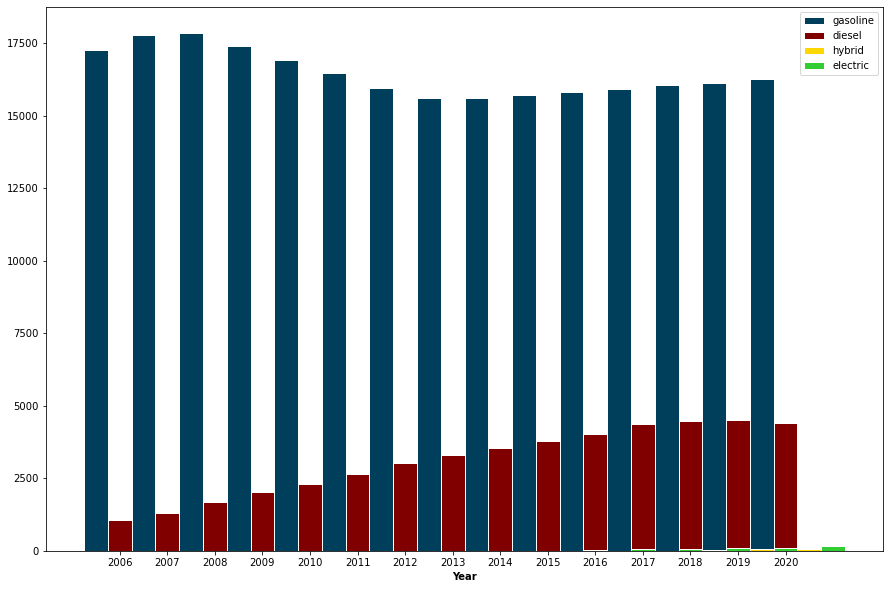

In [30]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


years = ['2006', '2007', '2008', '2009', '2010','2011','2012','2013','2014', '2015','2016','2017','2018','2019','2020']


# set heights of bars
bar_gas = gasoline_100['Copenhagen']
bar_diesel = diesel_100['Copenhagen']
bar_el = el_100['Copenhagen']
bar_hybrid=hybrid_100['Copenhagen']
 
f, ax = plt.subplots(figsize=(15,10))

# Set position of bar on X axis

barWidth = 0.50 # width of bars
r1 = np.arange(len(bar_gas))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
# Make the plot
plt.bar(r1, bar_gas, color='#003f5c', width=barWidth, edgecolor='white', label='gasoline')
plt.bar(r2, bar_diesel, color='maroon', width=barWidth, edgecolor='white', label='diesel')
plt.bar(r3, bar_hybrid ,color='gold', width=barWidth, edgecolor='white', label='hybrid')
plt.bar(r4, bar_el, color='limegreen', width=barWidth, edgecolor='white', label='electric')

# Add xticks on the middle of the group bars
plt.xlabel('Year', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bar_gas))], ['2006', '2007', '2008', '2009', '2010','2011','2012','2013','2014', '2015','2016','2017','2018','2019','2020'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

#### City Center

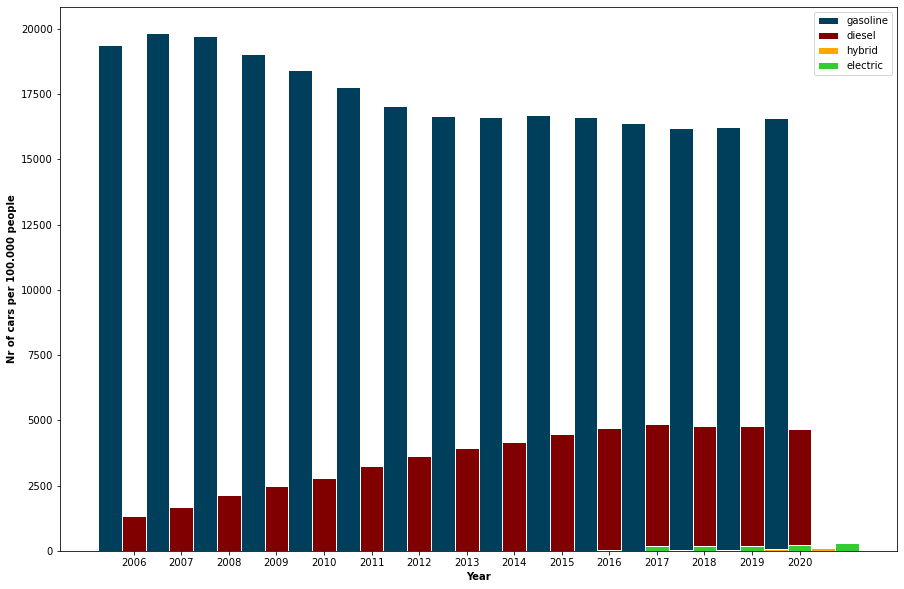

In [31]:
# set heights of bars
bar_gas = gasoline_100['City centre']
bar_diesel = diesel_100['City centre']
bar_el = el_100['City centre']
bar_hybrid=hybrid_100['City centre']
 
f, ax = plt.subplots(figsize=(15,10))

# Set position of bar on X axis

barWidth = 0.50 # width of bars
r1 = np.arange(len(bar_gas))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
# Make the plot
plt.bar(r1, bar_gas, color='#003f5c', width=barWidth, edgecolor='white', label='gasoline')
plt.bar(r2, bar_diesel, color='maroon', width=barWidth, edgecolor='white', label='diesel')
plt.bar(r3, bar_hybrid , color='#ffa600', width=barWidth, edgecolor='white', label='hybrid')
plt.bar(r4, bar_el, color='limegreen', width=barWidth, edgecolor='white', label='electric')

# Add xticks on the middle of the group bars
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Nr of cars per 100.000 people', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bar_gas))], ['2006', '2007', '2008', '2009', '2010','2011','2012','2013','2014', '2015','2016','2017','2018','2019','2020'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

#### Separate barcharts Copenhagen absolute numbers (not per 100.000)

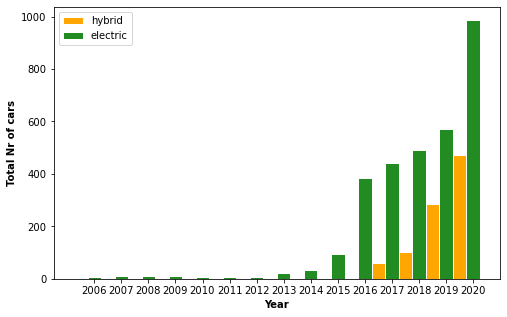

In [32]:
# set heights of bars
bar_el = el['Copenhagen']
bar_hybrid=hybrid['Copenhagen']
 
f, ax = plt.subplots(figsize=(8,5))

# Set position of bar on X axis

barWidth = 0.50 # width of bars
r1 = np.arange(len(bar_gas))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bar_hybrid, color='#ffa600',width=barWidth, edgecolor='white', label='hybrid')
plt.bar(r2, bar_el, color='forestgreen', width=barWidth, edgecolor='white', label='electric')

# Add xticks on the middle of the group bars
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Total Nr of cars', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bar_gas))], ['2006', '2007', '2008', '2009', '2010','2011','2012','2013','2014', '2015','2016','2017','2018','2019','2020'])
 
# Create legend & Show graphic
plt.legend()
plt.show()



Separate barcharts Copenhagen per 100.000

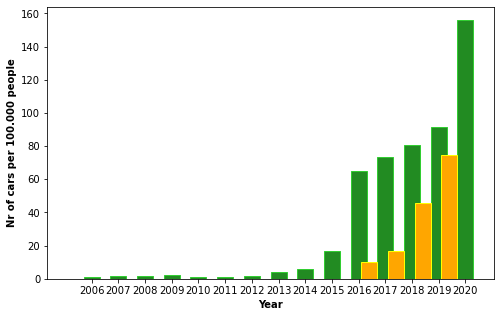

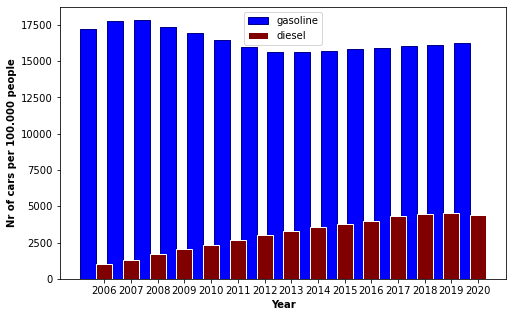

In [33]:
# set heights of bars
bar_el = el_100['Copenhagen']
bar_hybrid=hybrid_100['Copenhagen']
 
f1, ax = plt.subplots(figsize=(8,5))

# Set position of bar on X axis

barWidth = 0.60 # width of bars
r1 = np.arange(len(bar_gas))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r2, bar_el, color='forestgreen', width=barWidth, edgecolor='limegreen', label='electric')
plt.bar(r1, bar_hybrid, color='#ffa600', width=barWidth, edgecolor='yellow', label='hybrid')

# Add xticks on the middle of the group bars
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Nr of cars per 100.000 people', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bar_gas))], ['2006', '2007', '2008', '2009', '2010','2011','2012','2013','2014', '2015','2016','2017','2018','2019','2020'])
 

bar_gasoline = gasoline_100['Copenhagen']
bar_diesel=diesel_100['Copenhagen']
 
f2, ax = plt.subplots(figsize=(8,5))

r3 = np.arange(len(bar_gasoline))
r4 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r3, bar_gasoline, color='blue', width=barWidth, edgecolor='darkblue', label='gasoline')
plt.bar(r4, bar_diesel, color='maroon', width=barWidth, edgecolor='white', label='diesel')

# Add xticks on the middle of the group bars
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Nr of cars per 100.000 people', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bar_gas))], ['2006', '2007', '2008', '2009', '2010','2011','2012','2013','2014', '2015','2016','2017','2018','2019','2020'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

#### STACKED BAR CHART (PROPORTIONS)

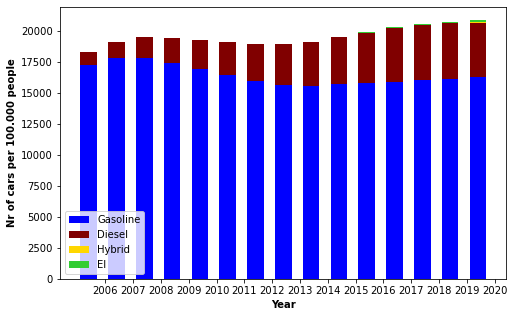

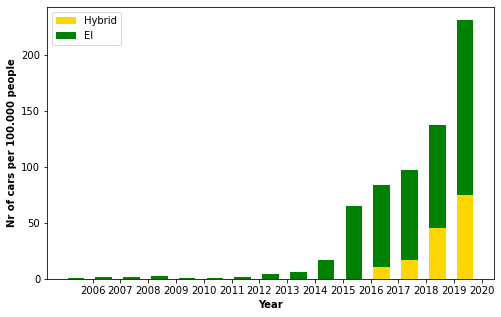

In [34]:

barWidth = 0.60

f, ax = plt.subplots(figsize=(8,5))

ax.bar(years, bar_gasoline , barWidth, color='b')
ax.bar(years, bar_diesel, barWidth ,bottom=bar_gasoline, color='maroon')
ax.bar(years, bar_hybrid, barWidth, bottom=bar_gasoline+bar_diesel, color='gold')
ax.bar(years, bar_el, barWidth, bottom=bar_gasoline+bar_diesel+bar_hybrid, color='limegreen')


plt.xlabel('Year', fontweight='bold')
plt.ylabel('Nr of cars per 100.000 people', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bar_gas))], ['2006', '2007', '2008', '2009', '2010','2011','2012','2013','2014', '2015','2016','2017','2018','2019','2020'])
 

plt.legend(labels=['Gasoline', 'Diesel', 'Hybrid', 'El'])
plt.show()


f, ax = plt.subplots(figsize=(8,5))

ax.bar(years, bar_hybrid, barWidth, color='gold')
ax.bar(years, bar_el, barWidth, bottom=bar_hybrid, color='green')


plt.xlabel('Year', fontweight='bold')
plt.ylabel('Nr of cars per 100.000 people', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bar_gas))], ['2006', '2007', '2008', '2009', '2010','2011','2012','2013','2014', '2015','2016','2017','2018','2019','2020'])
 

plt.legend(labels=['Hybrid', 'El'])
plt.show()

### LOGARITMIC PLOTS

C:\Users\Berglind\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


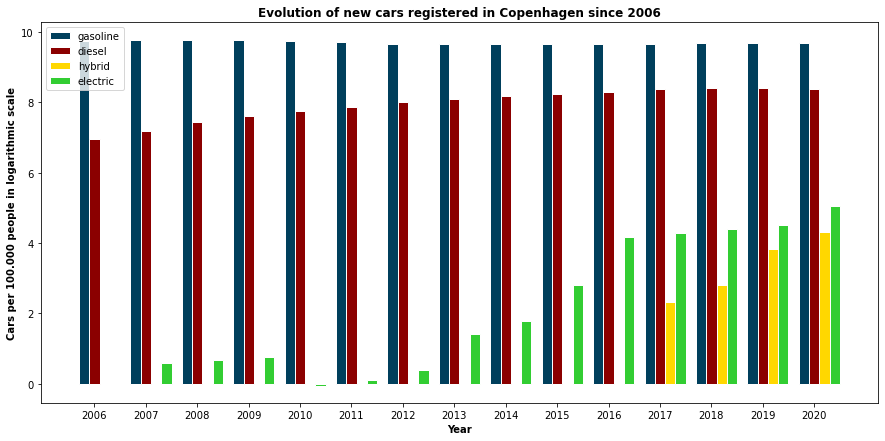

In [35]:
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np

years = ['2006', '2007', '2008', '2009', '2010','2011','2012','2013','2014', '2015','2016','2017','2018','2019','2020']

# set heights of bars
gas_log = np.log(gasoline_100['Copenhagen'])
diesel_log =  np.log(diesel_100['Copenhagen'])
el_log =  np.log(el_100['Copenhagen'])
hybrid_log= np.log(hybrid_100['Copenhagen'])
 
f, ax = plt.subplots(figsize=(15,7))

# Set position of bar on X axis

barWidth = 0.20 # width of bars
r1 = np.arange(len(gas_log))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# PLOT BARCHART
plt.bar(r1, gas_log, color='#003f5c', width=barWidth, edgecolor='white', label='gasoline')
plt.bar(r2, diesel_log, color='darkred', width=barWidth, edgecolor='white', label='diesel')
plt.bar(r3, hybrid_log ,color='gold', width=barWidth, edgecolor='white', label='hybrid')
plt.bar(r4, el_log, color='limegreen', width=barWidth, edgecolor='white', label='electric')

plt.xlabel('Year', fontweight='bold')
plt.ylabel('Cars per 100.000 people in logarithmic scale', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bar_gas))], ['2006', '2007', '2008', '2009', '2010','2011','2012','2013','2014', '2015','2016','2017','2018','2019','2020'])
plt.title('Evolution of new cars registered in Copenhagen since 2006',fontweight='bold')

plt.legend()
plt.show()

###### TO DO: fix Y axis

#### Østerbro

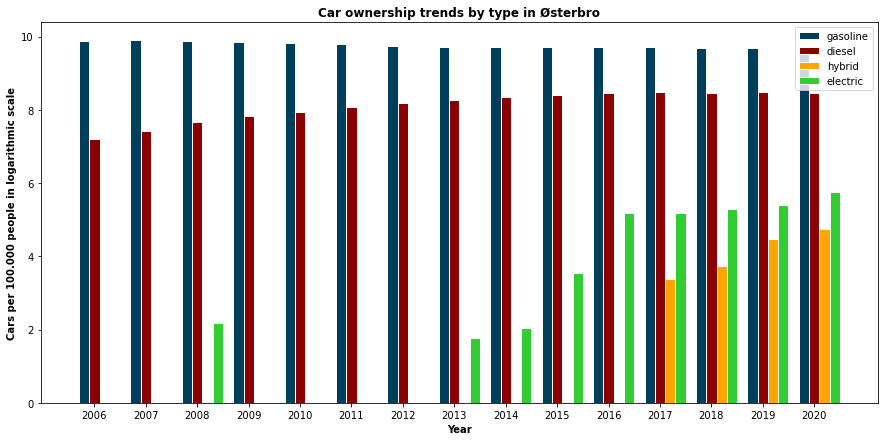

In [36]:
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np

years = ['2006', '2007', '2008', '2009', '2010','2011','2012','2013','2014', '2015','2016','2017','2018','2019','2020']

# set heights of bars
gas_log = np.log(gasoline_100['City centre'])
diesel_log =  np.log(diesel_100['City centre'])
el_log =  np.log(el_100['City centre'])
hybrid_log= np.log(hybrid_100['City centre'])
 
f, ax = plt.subplots(figsize=(15,7))

# Set position of bar on X axis

barWidth = 0.20 # width of bars
r1 = np.arange(len(gas_log))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# PLOT BARCHART
plt.bar(r1, gas_log, color='#003f5c', width=barWidth, edgecolor='white', label='gasoline')
plt.bar(r2, diesel_log, color='darkred', width=barWidth, edgecolor='white', label='diesel')
plt.bar(r3, hybrid_log ,color='orange', width=barWidth, edgecolor='white', label='hybrid')
plt.bar(r4, el_log, color='limegreen', width=barWidth, edgecolor='white', label='electric')

plt.xlabel('Year', fontweight='bold')
plt.ylabel('Cars per 100.000 people in logarithmic scale', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bar_gas))], ['2006', '2007', '2008', '2009', '2010','2011','2012','2013','2014', '2015','2016','2017','2018','2019','2020'])
plt.title('Car ownership trends by type in Østerbro',fontweight='bold')

plt.legend()
plt.show()


### Function that plots car per neighborhood over time in log scale

In [37]:
def car_neighborhood(i):
    years = ['2006', '2007', '2008', '2009', '2010','2011','2012','2013','2014', '2015','2016','2017','2018','2019','2020']

    gas_log = np.log(gasoline_100[i])
    diesel_log =  np.log(diesel_100[i])
    el_log =  np.log(el_100[i])
    hybrid_log= np.log(hybrid_100[i])
 
    f, ax = plt.subplots(figsize=(8,3))

    barWidth = 0.25 # width of bars
    r1 = np.arange(len(gas_log))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]

    # PLOT BARCHART
    plt.bar(r1, gas_log, color='#003f5c', width=barWidth, edgecolor='white', label='gasoline')
    plt.bar(r2, diesel_log, color='darkred', width=barWidth, edgecolor='white', label='diesel')
    plt.bar(r3, hybrid_log ,color='orange', width=barWidth, edgecolor='white', label='hybrid')
    plt.bar(r4, el_log, color='limegreen', width=barWidth, edgecolor='white', label='electric')

    plt.xlabel('Year', fontweight='bold')
    plt.ylabel('Cars per 100.000 people', fontweight='bold')
    plt.xticks([r + barWidth for r in range(len(bar_gas))], ['2006', '2007', '2008', '2009', '2010','2011','2012','2013','2014', '2015','2016','2017','2018','2019','2020'])
    plt.title(i,fontweight='bold')

    plt.legend()
    plt.show()

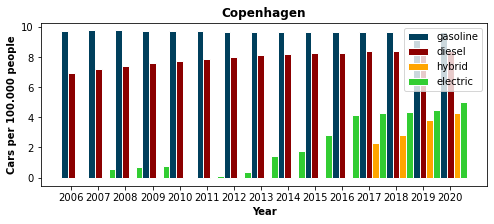

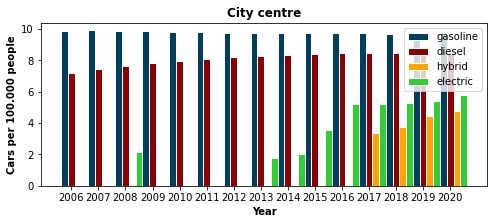

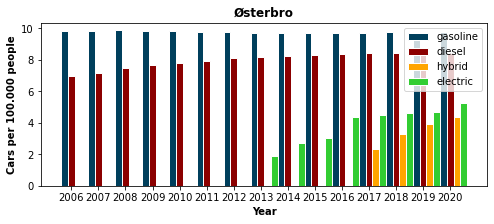

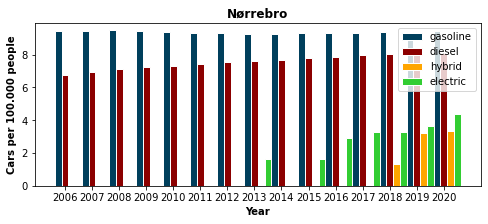

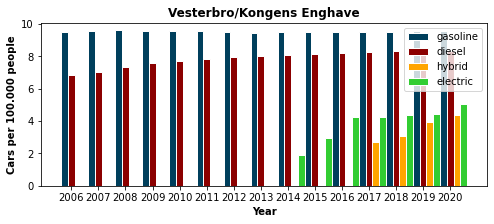

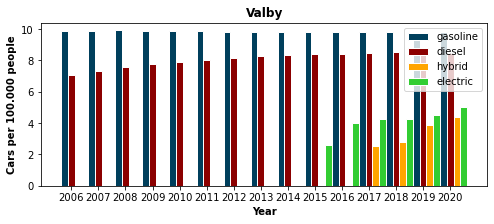

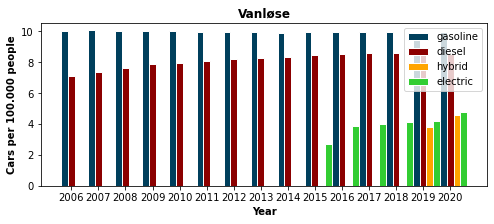

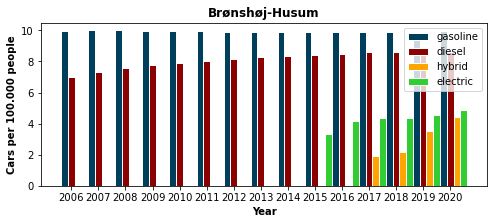

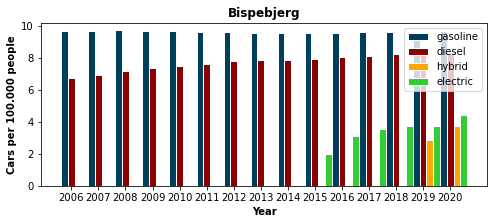

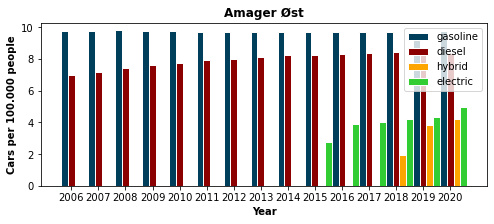

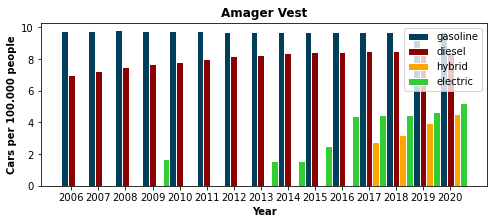

In [38]:
neighborhoods=(['Copenhagen', 'City centre', 'Østerbro', 'Nørrebro', 'Vesterbro/Kongens Enghave', 'Valby', 'Vanløse', 'Brønshøj-Husum', 'Bispebjerg', 'Amager Øst', 'Amager Vest'])

for i in neighborhoods:
    car_neighborhood(i)

#### PERCENTAGE CHANGE 

4 lines containing the percentage change for each type between year i and i+1

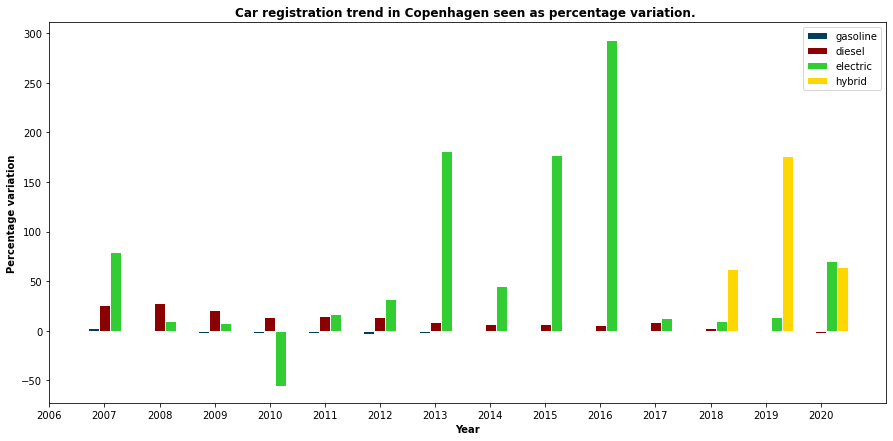

In [39]:
import matplotlib as plt
import matplotlib.pyplot as plt
import pandas as np
import numpy as np

f, ax = plt.subplots(figsize=(15,7))
years = ['2006', '2007', '2008', '2009', '2010','2011','2012','2013','2014', '2015','2016','2017','2018','2019','2020']

perc_gas=gasoline_100.Copenhagen.pct_change() * 100
perc_diesel=diesel_100.Copenhagen.pct_change() * 100
perc_hybrid=hybrid_100.Copenhagen.pct_change() * 100
perc_el=el_100.Copenhagen.pct_change() * 100

barWidth = 0.20 # width of bars
r1 = np.arange(len(perc_gas))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# PLOT BARCHART
plt.bar(r1, perc_gas, color='#003f5c', width=barWidth, edgecolor='white', label='gasoline')
plt.bar(r2, perc_diesel, color='darkred', width=barWidth, edgecolor='white', label='diesel')
plt.bar(r3, perc_el, color='limegreen', width=barWidth, edgecolor='white', label='electric')
plt.bar(r4, perc_hybrid,color='gold', width=barWidth, edgecolor='white', label='hybrid')

plt.xlabel('Year', fontweight='bold')
plt.ylabel('Percentage variation', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bar_gas))], ['2006', '2007', '2008', '2009', '2010','2011','2012','2013','2014', '2015','2016','2017','2018','2019','2020'])
plt.title('Car registration trend in Copenhagen seen as percentage variation. ',fontweight='bold')

plt.legend()
plt.show()


This plot is not particularly intuitive. But it helps to identify crucial years for electric(2013 and 2016) and hybrid (2019), and also 'bad' years for the car industry like 2010 where sales went down for all types of cars, most likely related to the 2008 economic crash. This can also be seen in scatter plots. 

#### SCATTER PLOTS FOR TOTAL NR OF CARS IN COPENHAGEN 

Pearsons correlation coefficients between year and nr of cars for the four types of car:
gasoline:  0.818
diesel:  0.994
hybrid:  0.673
el:  0.841


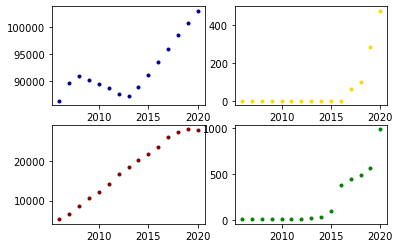

In [40]:
data_x=[gasoline['Year'],diesel['Year'], hybrid['Year'],el['Year']]
data_y=[gasoline['Copenhagen'],diesel['Copenhagen'], hybrid['Copenhagen'], el_100['Copenhagen']] 
np.dataString=['gasoline','diesel','hybrid','el']                

print ('Pearsons correlation coefficients between year and nr of cars for the four types of car:')
for i in range(4):
    PearsCorr=data_x[i].corr(data_y[i])                          #{:.3f}".format(PearsCorr)
    print(np.dataString[i]+': ', "{:.3f}".format(PearsCorr))    

# Plot the four data sets
import matplotlib.pyplot as plt  
fig, ax = plt.subplots(2, 2)


ax[0, 0].plot(gasoline['Year'],gasoline['Copenhagen'],'.', color='darkblue');
ax[1, 0].plot(diesel['Year'],diesel['Copenhagen'],'.', color='maroon');
ax[0, 1].plot(hybrid['Year'],hybrid['Copenhagen'], '.', color='gold');
ax[1, 1].plot(el['Year'],el['Copenhagen'], '.', color='green');

plt.show()

#### SCATTER PLOTS FOR TOTAL NR OF CARS IN COPENHAGEN PER 100.000 PEOPLE

Pearsons correlation coefficients between x and y values for the four types of car:
gasoline:  -0.748
diesel:  0.984
hybrid:  0.676
el:  0.841


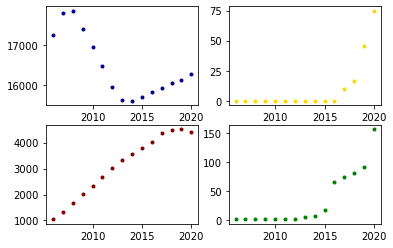

In [41]:
data_x=[gasoline_100['Year'],diesel_100['Year'], hybrid_100['Year'],el_100['Year']]
data_y=[gasoline_100['Copenhagen'],diesel_100['Copenhagen'], hybrid_100['Copenhagen'], el_100['Copenhagen']] 
np.dataString=['gasoline','diesel','hybrid','el']                

print ('Pearsons correlation coefficients between x and y values for the four types of car:')
for i in range(4):
    PearsCorr=data_x[i].corr(data_y[i])                          #{:.3f}".format(PearsCorr)
    print(np.dataString[i]+': ', "{:.3f}".format(PearsCorr))    

# Plot the four data sets
import matplotlib.pyplot as plt  
fig, ax = plt.subplots(2, 2)
ax[0, 0].plot(gasoline_100['Year'],gasoline_100['Copenhagen'],'.', color='darkblue');
ax[1, 0].plot(diesel_100['Year'],diesel_100['Copenhagen'],'.', color='maroon');
ax[0, 1].plot(hybrid_100['Year'],hybrid_100['Copenhagen'], '.', color='gold');
ax[1, 1].plot(el_100['Year'],el_100['Copenhagen'], '.', color='green');

plt.show()

#### Results:
- Gasoline car ownership: drop after 2008 global crisis, begining to increase again in 2013
- Diesel cars: more or less linear growth over the whole period. This begins changing in 2019, exactly after the Danish parliament political proposal of reducing gasoline and diesel cars in the whole country
- Hybrid cars: exponential growth from 2016.
- El cars: seems exponential growth after 2016.

#### Suggested causes for this results

- Danish regulations involved since 2013: (1) registration tax  exemption (105-180%) for electric and hybrid cars, and (2)Green owner tax exemption. This exception is decreasing from 2021, where the registration tax increases from 20% to 65% of the calculated registration tax. 

- Decrease of EV battery costs since 2015 (worldwide), dramatic decrease of hardware costs of a standard charging stations, and improved car batteries lifetime. Source: EU comission, Mckinsey&Co

- Increased number of manufactures and affordable El and hybrid car models such as Toyota and  Seat. 

- 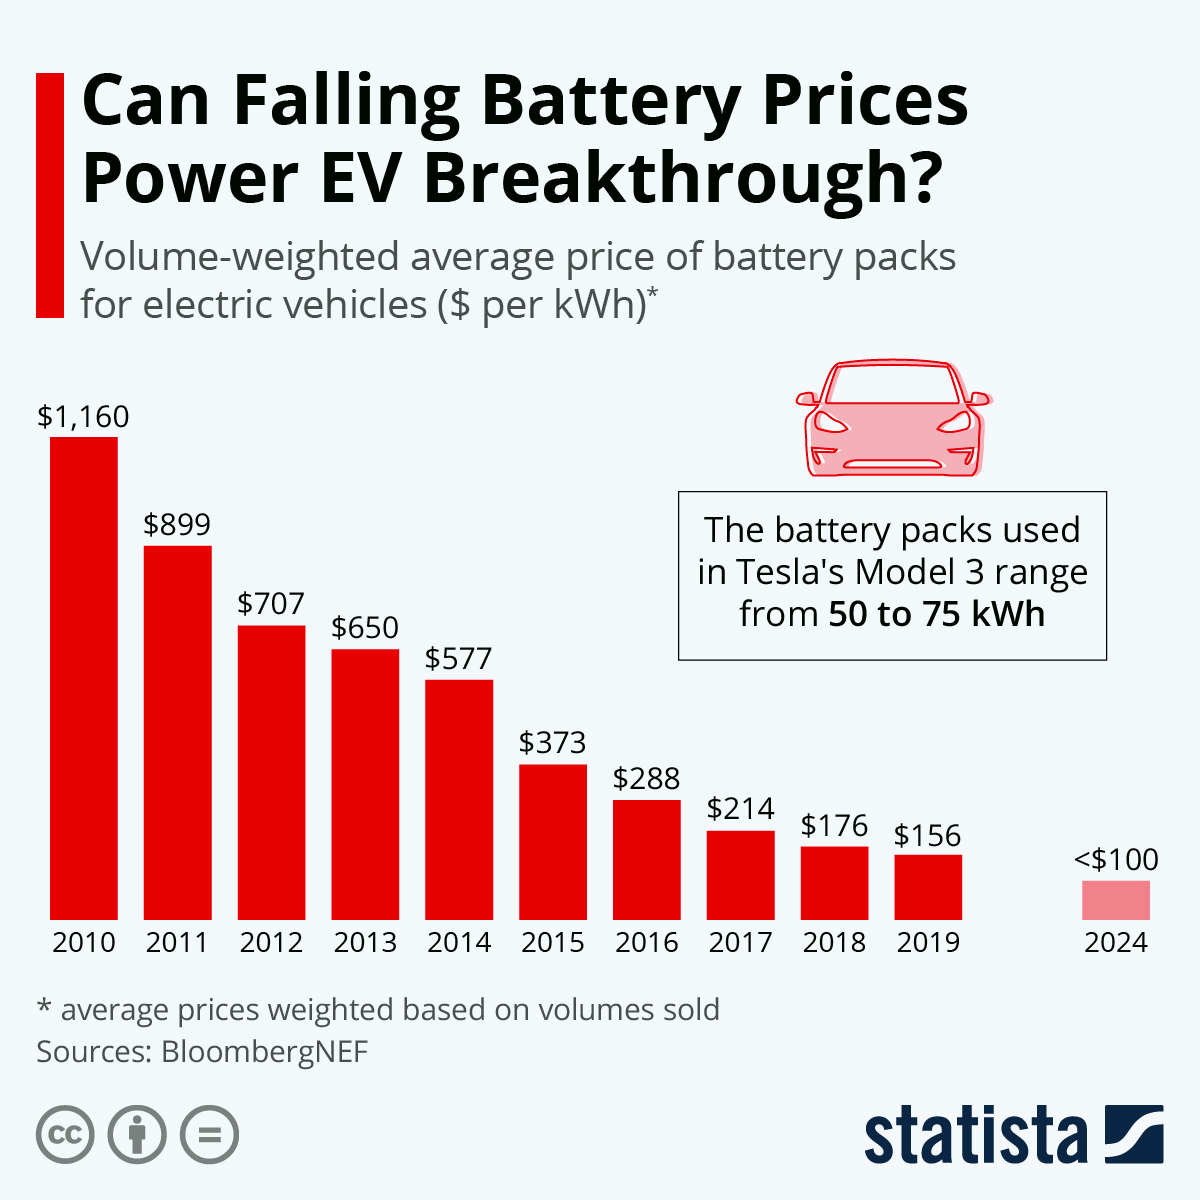

## ANNUAL SALARIES

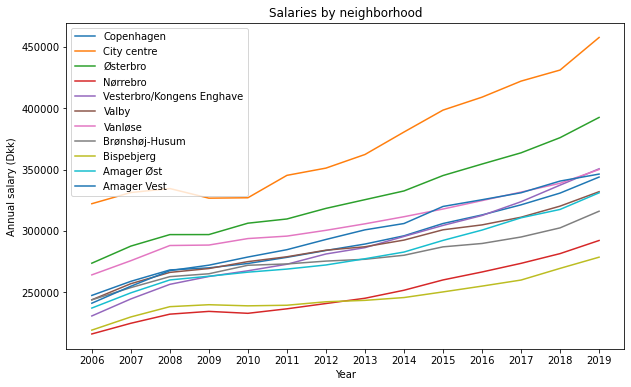

In [42]:
years = (['2006', '2007', '2008', '2009', '2010','2011','2012','2013','2014', '2015','2016','2017','2018','2019'])
plt.figure(figsize=(10,6))
for i in neighborhoods:
    plt.plot(years,salaries[i], label = i)
    plt.xlabel('Year')
    plt.ylabel('Annual salary (Dkk)')
    plt.title('Salaries by neighborhood')
    plt.legend()
    
    


The same with different code

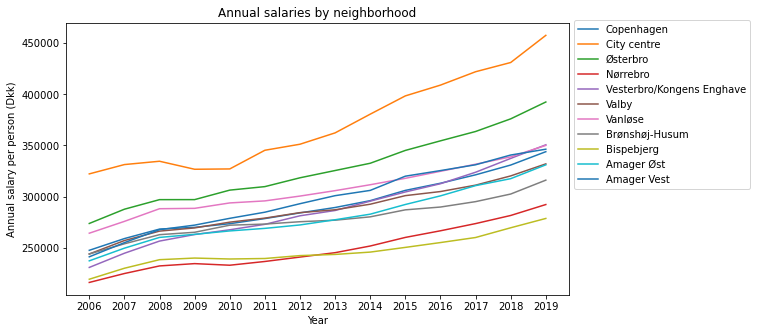

In [43]:
from matplotlib.pyplot import figure
import numpy as np

year = (['2006', '2007', '2008', '2009', '2010','2011','2012','2013','2014', '2015','2016','2017','2018','2019'])

plt.figure(figsize=(9,5))
ax = plt.subplot(111)

for i in neighborhoods:
    line, = ax.plot(year, salaries[i], label=i)
    
ax.legend(loc='center left', bbox_to_anchor=(1, 0.7))

plt.xlabel('Year')
plt.ylabel('Annual salary per person (Dkk)')
plt.title('Annual salaries by neighborhood')
plt.show()


#### Analysis



In [44]:
year = ['2006', '2007', '2008', '2009', '2010','2011','2012','2013','2014', '2015','2016','2017','2018','2019']
neighborhoods=(['Copenhagen', 'City centre', 'Østerbro', 'Nørrebro', 'Vesterbro/Kongens Enghave', 'Valby', 'Vanløse', 'Brønshøj-Husum', 'Bispebjerg', 'Amager Øst', 'Amager Vest'])


### Car Type vs Salary 

Here we plot car ownership vs salary for new cars registered between 2006 and 2019 to look for any correlation. We delete data for 'Copenhagen' in the plot since this is an average annual value for all the other neighborhoods, but we use this average value for the regresion line. We also delete data for the 'Year' column which we dont need to plot, and for 2020 because salaries for 2020 were not yet published at Statistik Banken at the time we loaded the data. 

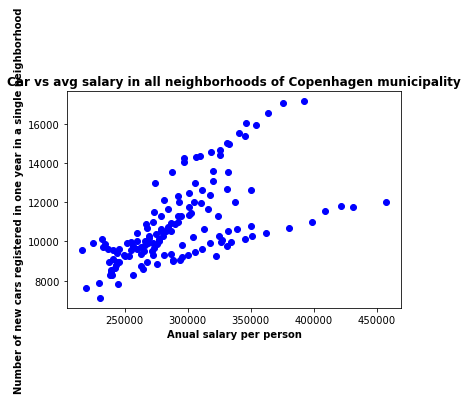

In [45]:
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np

salaries=pd.read_excel("salaries.xlsx")
salaries_=salaries.drop(['Copenhagen','Year'], axis=1)
cars=pd.read_excel("cars.xlsx")
cars_03_19=cars.drop([14])
cars_3_19=cars_03_19.drop(['Copenhagen', 'Year'], axis=1)

matplotlib.pyplot.scatter(salaries_,cars_3_19, c='b', )
plt.xlabel('Anual salary per person', fontweight='bold')
plt.ylabel('Number of new cars registered in one year in a single neighborhood', fontweight='bold')
plt.title('Car vs avg salary in all neighborhoods of Copenhagen municipality', fontweight='bold')

plt.show()

### Delete next plot or discuss how to improve it

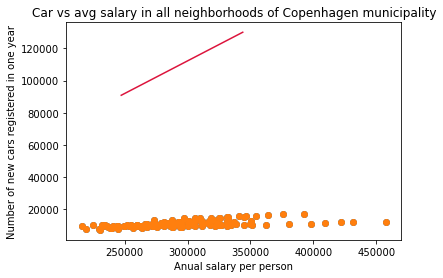

In [46]:
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np

salaries=pd.read_excel("salaries.xlsx")
salaries_=salaries.drop(['Copenhagen','Year'], axis=1)
cars=pd.read_excel("cars.xlsx")
cars_03_19=cars.drop([14])
cars_3_19=cars_03_19.drop(['Copenhagen', 'Year'], axis=1)

matplotlib.pyplot.scatter(salaries_,cars_3_19)
plt.xlabel('Anual salary per person')
plt.ylabel('Number of new cars registered in one year')
plt.title('Car vs avg salary in all neighborhoods of Copenhagen municipality')

N=len(salaries['Copenhagen'])  
x_mean=(1/N)*(sum(salaries['Copenhagen']))
y_mean=(1/N)*(sum(cars_03_19['Copenhagen']))
a=(sum(salaries['Copenhagen']*cars_03_19['Copenhagen'])-(N*x_mean*y_mean))/(sum(salaries['Copenhagen']**2)-N*(x_mean**2))
b=y_mean-a*x_mean
plt.plot(salaries['Copenhagen'], a*salaries['Copenhagen'] + b, color="crimson")


import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np

salaries=pd.read_excel("salaries.xlsx")
salaries_=salaries.drop(['Copenhagen','Year'], axis=1)
cars=pd.read_excel("cars.xlsx")
cars_03_19=cars.drop([14])
cars_3_19=cars_03_19.drop(['Copenhagen', 'Year'], axis=1)

matplotlib.pyplot.scatter(salaries_,cars_3_19)
plt.xlabel('Anual salary per person')
plt.ylabel('Number of new cars registered in one year')
plt.title('Car vs avg salary in all neighborhoods of Copenhagen municipality')

plt.show()

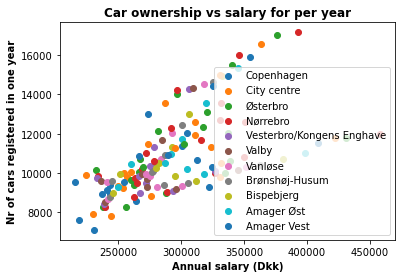

In [47]:
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np

salaries=pd.read_excel("salaries.xlsx")
cars=pd.read_excel("cars.xlsx")

year=([2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])
for i in year:
    cars_i=cars[cars['Year']==i]
    cars_i=cars_i.drop(['Copenhagen', 'Year'], axis=1)
    salaries_i=salaries[salaries['Year']==i]
    salaries_i=salaries_i.drop(['Copenhagen', 'Year'], axis=1)
    matplotlib.pyplot.scatter(salaries_i,cars_i)

plt.legend(neighborhoods, loc=4)    
plt.xlabel('Annual salary (Dkk)', fontweight='bold')
plt.ylabel('Nr of cars registered in one year',fontweight='bold')
plt.title('Car ownership vs salary for per year',fontweight='bold')    
plt.show()

# Car ownership vs salary for vs neighborhood

#### Need to discuss line cars=cars.div(people)*100000 

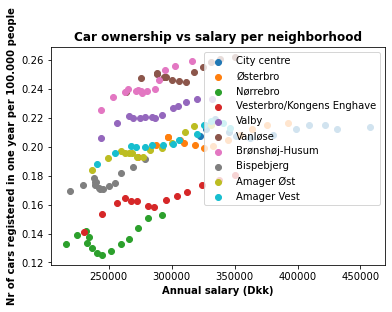

In [48]:
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np

salaries=pd.read_excel("salaries.xlsx")
cars=pd.read_excel("cars.xlsx")
cars=cars.div(people)
cars=cars.drop([14])
carsT=cars.T
carsT=carsT.reset_index()
carsT=carsT.drop([0])
salariesT=salaries.T
salariesT = salariesT.reset_index()
salariesT=salariesT.drop([0])

neighborhoods=np.array(['City centre', 'Østerbro', 'Nørrebro', 'Vesterbro/Kongens Enghave', 'Valby', 'Vanløse', 'Brønshøj-Husum', 'Bispebjerg', 'Amager Øst', 'Amager Vest'])


for i in neighborhoods:
    cars_i=carsT[carsT['index']==i]
    cars_i=cars_i.drop(['index'], axis=1)
    salaries_i=salariesT[salariesT['index']==i]
    salaries_i=salaries_i.drop(['index'], axis=1)
    matplotlib.pyplot.scatter(salaries_i,cars_i)

plt.legend(neighborhoods, loc=1)
plt.xlabel('Annual salary (Dkk)',fontweight='bold')
plt.ylabel('Nr of cars registered in one year per 100.000 people',fontweight='bold')
plt.title('Car ownership vs salary per neighborhood',fontweight='bold')    
plt.show()

## Analysis:

Looking at the salaries per neighborhood, we saw that the **City Centre and Østerport are the welthiest neighborhoods**. In contrast, the lowest salaries are seen in Nørrebro and Bispebjerg. When we look at the number of new cars registered every year per inhabitants we see that **Vanløse, Brønshøj-Husum and Valby** are the neighborhoods where people have registered a **higher number of cars per person** than in the other neighborhoods, despite of not being the welthiest. A possible cause for this can be related to the life style, parking space availability and public transport infrastructure.

### MAP: car ownership by neighborhood 

In [49]:
cars=pd.read_excel("cars.xlsx")
cars_100=(cars/people)*100000
cars_100['Year']=([2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])

cars2019=cars_100[cars_100['Year']==2019]
cars2019=cars2019.T
cars2019['cars']=cars2019[13]
cars2019=pd.DataFrame(data=cars2019['cars'])
cars2019=cars2019.drop(['Year'])

# Turn index into column so we can merge
cars2019['navn'] = cars2019.index

#geo=gdp.read_file('neighborhood.shp')
#geo['navn']=(['Nørrebro', 'Brønshøj-Husum', 'Bispebjerg', 'Amager Vest','Vanløse','City centre', 'Amager Øst', 'Østerbro', 'Vesterbro/Kongens Enghave', 'Valby'])

#geo_cars2019=geo.merge(cars2019, on = ['navn'], how='inner')[['navn','cars','geometry']]

#geo_cars2019.plot(column='cars', cmap='OrRd', edgecolor = "maroon",  legend=True)
#plt.title('Nr of cars per neighborhood',fontweight='bold') 
#plt.xlabel('Longitude',fontweight='bold')
#plt.ylabel('Latitude',fontweight='bold')
#plt.show()

#### Green/Hybrid car trend between 2017-2020

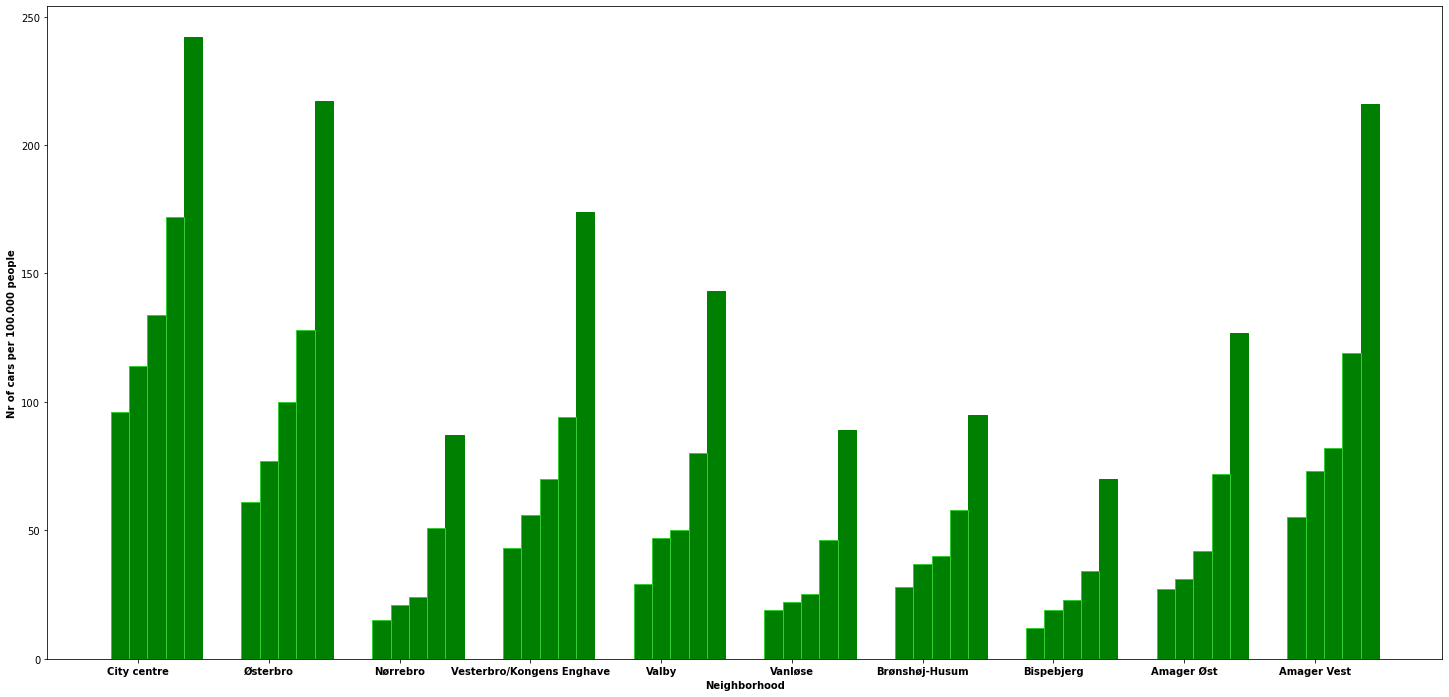

In [50]:
el=pd.read_excel("el.xlsx")
el_=el.T
el_=el_.reset_index()
el_=el_.drop([0,1])


hybrid=pd.read_excel("hybrid.xlsx")

hybrid_=hybrid.T
hybrid_=hybrid_.reset_index()
hybrid_=hybrid_.drop([0,1])


combined=el_+hybrid_


f1, ax = plt.subplots(figsize=(25,12))

# Set position of bar on X axis

barWidth = 0.14 # width of bars
r1 = np.arange(len(combined))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
 
# Make the plot
plt.bar(r5,combined[14], color='green', width=barWidth, edgecolor='green', label='2020')
plt.bar(r4,combined[13], color='green', width=barWidth, edgecolor='limegreen', label='2019')
plt.bar(r3,combined[12], color='green', width=barWidth, edgecolor='limegreen', label='2018')
plt.bar(r2,combined[11], color='green', width=barWidth, edgecolor='limegreen', label='2017')
plt.bar(r1,combined[10], color='green', width=barWidth, edgecolor='limegreen', label='2016')


# Add xticks on the middle of the group bars
plt.xlabel('Neighborhood', fontweight='bold')
plt.ylabel('Nr of cars per 100.000 people', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(neighborhoods))], ['City centre', 'Østerbro', 'Nørrebro', 'Vesterbro/Kongens Enghave', 'Valby', 'Vanløse', 'Brønshøj-Husum', 'Bispebjerg', 'Amager Øst', 'Amager Vest'],fontweight='bold')
plt.show()

### Evolution of green car trend every two years

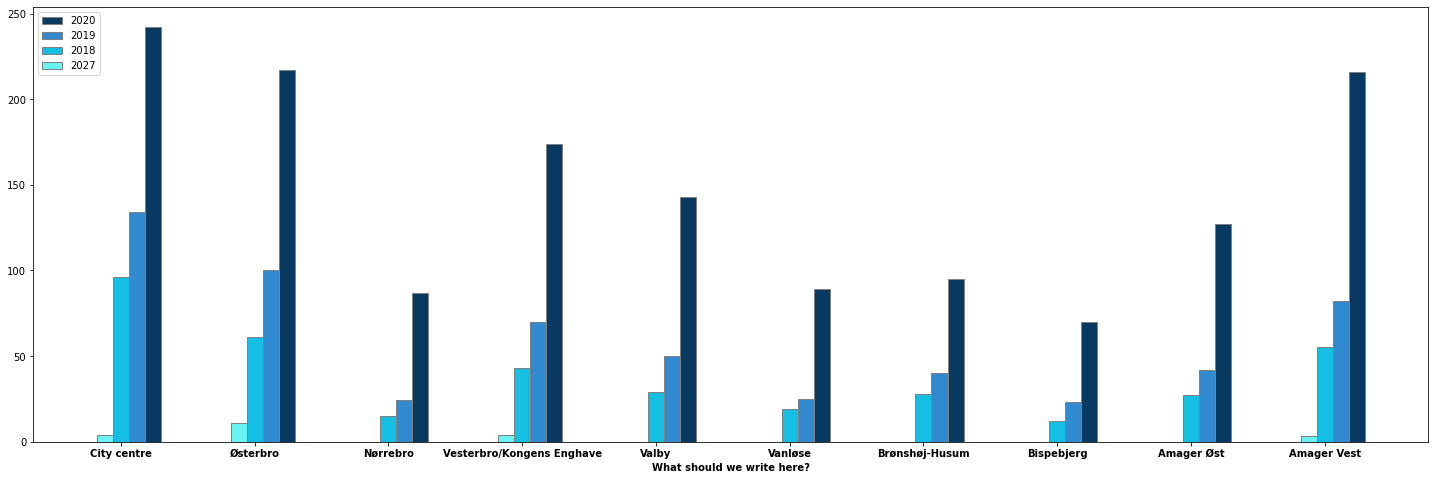

In [59]:
combined=el_+hybrid_

f1, ax = plt.subplots(figsize=(25,8))

# Set position of bar on X axis

barWidth = 0.12 # width of bars
r1 = np.arange(len(combined))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
# Make the plot
plt.bar(r4,combined[14], color='#083961', width=barWidth, edgecolor='grey', label='2020')
plt.bar(r3,combined[12], color='#3189D0', width=barWidth, edgecolor='grey', label='2019')
plt.bar(r2,combined[10], color='#15BFE3', width=barWidth, edgecolor='grey', label='2018')
plt.bar(r1,combined[8], color='#69F3F2', width=barWidth, edgecolor='grey', label='2027')

# Add xticks on the middle of the group bars
plt.xlabel('Neighborhood', fontweight='bold')
plt.ylabel('What should we write here? number of cars by....?', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(neighborhoods))], ['City centre', 'Østerbro', 'Nørrebro', 'Vesterbro/Kongens Enghave', 'Valby', 'Vanløse', 'Brønshøj-Husum', 'Bispebjerg', 'Amager Øst', 'Amager Vest'],fontweight='bold')

plt.legend()
plt.show()